In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch.autograd.functional import hessian, jacobian
from torchviz import make_dot

sys.path.insert(0, "../src")
from utils import minibatch, u_analytic

dtype = torch.float
#device = torch.device("cuda:0")
device = torch.device("cpu")

#torch.autograd.set_detect_anomaly(True)

In [2]:
def g_trial(x, t, N):
    return (1 - t) * torch.sin(np.pi * x) + x * (1 - x) * t * N

#@torch.jit.script
def ode_loss(input_data, output_data):
    loss = 0
    
    for i in range(input_data.size(0)):
        Jx, Jt, Jn = jacobian(g_trial, (input_data[i,0], input_data[i,1], output_data[i]),create_graph=True)
        Hx, Ht, Hn = hessian(g_trial, (input_data[i,0], input_data[i,1], output_data[i]),create_graph=True)
        loss = loss + (Jt - Hx[0]).pow(2)
    
    return loss / input_data.size(0)

def g_trial_np(x, t, N):
    return (1 - t) * np.sin(np.pi * x) + x * (1 - x) * t * N

def plot_pde(model, grid_size=100):
    # Set up plotting data
    x = np.linspace(0,1,grid_size, dtype=np.float)
    t = np.linspace(0,1,grid_size, dtype=np.float)
    x, t = np.meshgrid(x, t) 
    x_flat = x.flatten()
    t_flat = t.flatten()
    X = np.concatenate((x_flat.reshape(-1,1), t_flat.reshape(-1, 1)), axis=1)

    # Convert to pytorch tensors
    xp = torch.from_numpy(X)
    xp = xp.to(dtype).to(device)
    
    # Evaluate model
    model.eval()    
    N_pred = model(xp)
    N_pred = N_pred.detach().numpy()
    N_pred = N_pred.reshape(grid_size, grid_size)

    g = g_trial_np(x, t, N_pred)

    fig, ax = plt.subplots(figsize=(4, 3))
    cf = ax.pcolormesh(x, t, g, cmap=plt.get_cmap("inferno"))
    fig.colorbar(cf, ax=ax)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$t$")

# Training on a 10x10 Grid

We first train a model on an equispaced 10x10 grid using a FFNN with 2 hidden layers with 100 neurons each and the ReLU activation function.

In [29]:
# Set up data in numpy
grid_size = 10
x = np.linspace(0,1,grid_size, dtype=np.float)
t = np.linspace(0,1,grid_size, dtype=np.float)
x, t = np.meshgrid(x, t) 
x = x.flatten()
t = t.flatten()
X = np.concatenate((x.reshape(-1,1), t.reshape(-1, 1)), axis=1)

# Convert to pytorch tensors
x = torch.from_numpy(X)
x = x.to(dtype).to(device)
x.requires_grad = True

In [35]:
# Shape of the network
num_points, input_dim = X.shape
hidden_neurons = 100
output_dim = 1

# Set up the model
learning_rate = 0.002
N_minibatches = int(num_points / 16)

model_10 = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden_neurons),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_neurons, hidden_neurons),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_neurons, hidden_neurons),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_neurons, output_dim),
)
optimizer_10 = torch.optim.Adam(model_10.parameters(), lr=learning_rate)

TOT_EPOCHS_10 = 0

loss_arr_tot_10 = np.empty(0, dtype=np.float)
epoch_arr_tot_10 = np.empty(0, dtype=np.float)

500: loss =  tensor([0.0011], grad_fn=<DivBackward0>)
501: loss =  tensor([0.0005], grad_fn=<DivBackward0>)
502: loss =  tensor([0.0008], grad_fn=<DivBackward0>)
503: loss =  tensor([0.0015], grad_fn=<DivBackward0>)
504: loss =  tensor([0.0014], grad_fn=<DivBackward0>)
505: loss =  tensor([0.0010], grad_fn=<DivBackward0>)
506: loss =  tensor([0.0011], grad_fn=<DivBackward0>)
507: loss =  tensor([0.0012], grad_fn=<DivBackward0>)
508: loss =  tensor([0.0007], grad_fn=<DivBackward0>)
509: loss =  tensor([0.0033], grad_fn=<DivBackward0>)
510: loss =  tensor([0.0025], grad_fn=<DivBackward0>)
511: loss =  tensor([0.0053], grad_fn=<DivBackward0>)
512: loss =  tensor([0.0031], grad_fn=<DivBackward0>)
513: loss =  tensor([0.0020], grad_fn=<DivBackward0>)
514: loss =  tensor([0.0015], grad_fn=<DivBackward0>)
515: loss =  tensor([0.0027], grad_fn=<DivBackward0>)
516: loss =  tensor([0.0020], grad_fn=<DivBackward0>)
517: loss =  tensor([0.0014], grad_fn=<DivBackward0>)
518: loss =  tensor([0.0012]

652: loss =  tensor([0.0008], grad_fn=<DivBackward0>)
653: loss =  tensor([0.0008], grad_fn=<DivBackward0>)
654: loss =  tensor([0.0009], grad_fn=<DivBackward0>)
655: loss =  tensor([0.0004], grad_fn=<DivBackward0>)
656: loss =  tensor([0.0005], grad_fn=<DivBackward0>)
657: loss =  tensor([0.0007], grad_fn=<DivBackward0>)
658: loss =  tensor([0.0007], grad_fn=<DivBackward0>)
659: loss =  tensor([0.0004], grad_fn=<DivBackward0>)
660: loss =  tensor([0.0005], grad_fn=<DivBackward0>)
661: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
662: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
663: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
664: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
665: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
666: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
667: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
668: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
669: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
670: loss =  tensor([0.0003]

804: loss =  tensor([0.0015], grad_fn=<DivBackward0>)
805: loss =  tensor([0.0010], grad_fn=<DivBackward0>)
806: loss =  tensor([0.0024], grad_fn=<DivBackward0>)
807: loss =  tensor([0.0009], grad_fn=<DivBackward0>)
808: loss =  tensor([0.0036], grad_fn=<DivBackward0>)
809: loss =  tensor([0.0018], grad_fn=<DivBackward0>)
810: loss =  tensor([0.0019], grad_fn=<DivBackward0>)
811: loss =  tensor([0.0009], grad_fn=<DivBackward0>)
812: loss =  tensor([0.0004], grad_fn=<DivBackward0>)
813: loss =  tensor([0.0004], grad_fn=<DivBackward0>)
814: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
815: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
816: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
817: loss =  tensor([0.0005], grad_fn=<DivBackward0>)
818: loss =  tensor([0.0005], grad_fn=<DivBackward0>)
819: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
820: loss =  tensor([0.0002], grad_fn=<DivBackward0>)
821: loss =  tensor([0.0002], grad_fn=<DivBackward0>)
822: loss =  tensor([0.0002]

956: loss =  tensor([0.0004], grad_fn=<DivBackward0>)
957: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
958: loss =  tensor([0.0002], grad_fn=<DivBackward0>)
959: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
960: loss =  tensor([0.0002], grad_fn=<DivBackward0>)
961: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
962: loss =  tensor([0.0002], grad_fn=<DivBackward0>)
963: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
964: loss =  tensor([0.0004], grad_fn=<DivBackward0>)
965: loss =  tensor([0.0005], grad_fn=<DivBackward0>)
966: loss =  tensor([0.0005], grad_fn=<DivBackward0>)
967: loss =  tensor([0.0004], grad_fn=<DivBackward0>)
968: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
969: loss =  tensor([0.0004], grad_fn=<DivBackward0>)
970: loss =  tensor([0.0004], grad_fn=<DivBackward0>)
971: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
972: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
973: loss =  tensor([0.0003], grad_fn=<DivBackward0>)
974: loss =  tensor([0.0002]

Text(0.5, 0, 'Epoch')

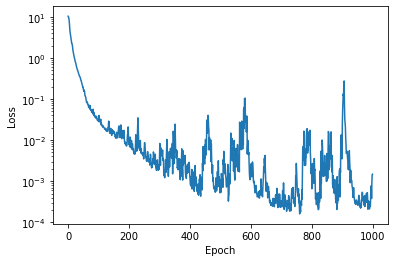

In [38]:
EPOCHS = 500

loss_arr_curr_10 = np.empty(EPOCHS, dtype=np.float)
epoch_arr_curr_10 = np.empty(EPOCHS, dtype=np.float)

model_10.train()
for epoch in range(EPOCHS):
    # Pick out a new set of minibatches
    mb = minibatch(num_points, N_minibatches)
    for i in range(N_minibatches):
        N_output = model_10(x[mb[i]])           # Forward pass
        loss = ode_loss(x[mb[i]], N_output)  # Compute loss
        optimizer_10.zero_grad()                # Zero gradients from prev itter
        loss.backward()                      # Backward pass
        optimizer_10.step()                     # Optimize with ADAM
        
    # Compute loss of entire sample
    N_output = model_10(x) 
    loss = ode_loss(x, N_output)
    print(f"{TOT_EPOCHS_10 + epoch}: loss = ",loss) 
    loss_arr_curr_10[epoch] = loss
    epoch_arr_curr_10[epoch] = TOT_EPOCHS_10 + epoch

TOT_EPOCHS_10 += EPOCHS    
loss_arr_tot_10 = np.append(loss_arr_tot_10, loss_arr_curr_10)
epoch_arr_tot_10 = np.append(epoch_arr_tot_10, epoch_arr_curr_10)

plt.semilogy(epoch_arr_tot_10, loss_arr_tot_10)
plt.ylabel("Loss")
plt.xlabel("Epoch")

<ipython-input-2-4c52362df4b0>:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cf = ax.pcolormesh(x, t, g, cmap=plt.get_cmap("inferno"))


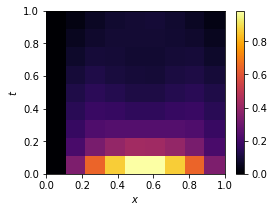

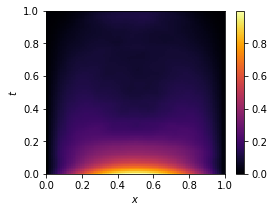

In [39]:
plot_pde(model_10, 10)
plot_pde(model_10, 100)

In [7]:
#make_dot(N_output).render("output_graph", format="pdf")
#make_dot(loss).render("loss_graph", format="pdf")

# Training on a 100x100 Grid

In [40]:
# Set up data in numpy
grid_size = 100
x = np.linspace(0,1,grid_size, dtype=np.float)
t = np.linspace(0,1,grid_size, dtype=np.float)
x, t = np.meshgrid(x, t) 
x = x.flatten()
t = t.flatten()
X = np.concatenate((x.reshape(-1,1), t.reshape(-1, 1)), axis=1)

# Convert to pytorch tensors
x = torch.from_numpy(X)
x = x.to(dtype).to(device)
x.requires_grad = True

In [41]:
# Shape of the network
num_points, input_dim = X.shape
hidden_neurons = 100
output_dim = 1

# Set up the model
learning_rate = 0.002
N_minibatches = int(num_points / 16)

model_100 = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden_neurons),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_neurons, hidden_neurons),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_neurons, hidden_neurons),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_neurons, output_dim),
)
optimizer_100 = torch.optim.Adam(model_100.parameters(), lr=learning_rate)

TOT_EPOCHS_100 = 0

loss_arr_tot_100 = np.empty(0, dtype=np.float)
epoch_arr_tot_100 = np.empty(0, dtype=np.float)

print("Number of minibatches = ", N_minibatches)

Number of minibatches =  625


## Notes

- Gradient changes most rapidly at t ~ 0 to 0.2, so these areas will be most critical for the network to fit correclty. Later, less steeper parts of the function will likely have less of an effect on the cost function

In [46]:
EPOCHS = 100

loss_arr_curr_100 = np.empty(EPOCHS, dtype=np.float)
epoch_arr_curr_100 = np.empty(EPOCHS, dtype=np.float)

model_100.train()
for epoch in range(EPOCHS):
    # Pick out a new set of minibatches
    mb = minibatch(num_points, N_minibatches)
    for i in range(N_minibatches):
        N_output = model_100(x[mb[i]])           # Forward pass
        loss = ode_loss(x[mb[i]], N_output)  # Compute loss
        optimizer_100.zero_grad()                # Zero gradients from prev itter
        loss.backward()                      # Backward pass
        optimizer_100.step()                     # Optimize with ADAM
        
    # Compute loss of entire sample
    N_output = model_100(x) 
    loss = ode_loss(x, N_output)
    print(f"{TOT_EPOCHS_100 + epoch}: loss = ",loss) 
    loss_arr_curr_100[epoch] = loss
    epoch_arr_curr_100[epoch] = TOT_EPOCHS_100 + epoch

TOT_EPOCHS_100 += EPOCHS    
loss_arr_tot_100 = np.append(loss_arr_tot_100, loss_arr_curr_100)
epoch_arr_tot_100 = np.append(epoch_arr_tot_100, epoch_arr_curr_100)

plt.semilogy(epoch_arr_tot_100, loss_arr_tot_100)
plt.ylabel("Loss")
plt.xlabel("Epoch")

20: loss =  tensor([0.0108], grad_fn=<DivBackward0>)
21: loss =  tensor([0.0035], grad_fn=<DivBackward0>)
22: loss =  tensor([0.0026], grad_fn=<DivBackward0>)
23: loss =  tensor([0.0075], grad_fn=<DivBackward0>)
24: loss =  tensor([0.0079], grad_fn=<DivBackward0>)
25: loss =  tensor([0.0037], grad_fn=<DivBackward0>)
26: loss =  tensor([0.0015], grad_fn=<DivBackward0>)
27: loss =  tensor([0.0047], grad_fn=<DivBackward0>)
28: loss =  tensor([0.0298], grad_fn=<DivBackward0>)
29: loss =  tensor([0.0044], grad_fn=<DivBackward0>)
30: loss =  tensor([0.0041], grad_fn=<DivBackward0>)
31: loss =  tensor([0.0081], grad_fn=<DivBackward0>)
32: loss =  tensor([0.0021], grad_fn=<DivBackward0>)
33: loss =  tensor([0.0034], grad_fn=<DivBackward0>)
34: loss =  tensor([0.0024], grad_fn=<DivBackward0>)
35: loss =  tensor([0.0012], grad_fn=<DivBackward0>)
36: loss =  tensor([0.0011], grad_fn=<DivBackward0>)
37: loss =  tensor([0.0008], grad_fn=<DivBackward0>)
38: loss =  tensor([0.0025], grad_fn=<DivBackw

KeyboardInterrupt: 

In [ ]:
plot_pde(model=model_100, grid_size=10)
plot_pde(model=model_100, grid_size=100)